# Initial YOLO Setup

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5=

Cloning into 'yolov5='...
fatal: unable to access 'https://github.com/ultralytics/yolov5=/': The requested URL returned error: 400


In [ ]:
!cd yolov5

/bin/bash: line 0: cd: yolov5: No such file or directory


In [ ]:
! pip install -r /content/yolov5/requirements.txt

#Limiting the model only to desired class

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [0, 1, 2, 3, 5, 7]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img ='https://media.architecturaldigest.com/photos/634d7f55f51820e32fae5c81/16:9/w_2560%2Cc_limit/49_CELESTIQ_Rear3q.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 1440x2560 1 person, 1 car
Speed: 338.4ms pre-process, 3481.3ms inference, 45.2ms NMS per image at shape (1, 3, 384, 640)


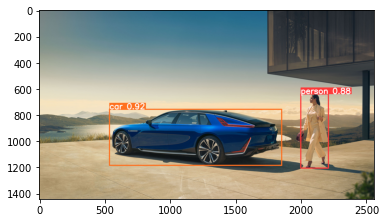

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

#Calculating Mean distances between the classes

In [ ]:
def midpoint(xmin, ymin, xmax, ymax):
  center_w = xmax - xmin
  center_h = ymax - ymin
  center_x = 0.5*(xmin + xmax)
  center_y = 0.5*(ymin + ymax)
  return (center_x, center_y)
center = []
for i in range(len(res)):
  center.append(midpoint(res['xmin'][i], res['ymin'][i], res['xmax'][i], res['ymax'][i]))
distance = pow(pow((center[0][0]-center[1][0]),2) + pow((center[0][1]-center[1][1]),2),0.5) 
  

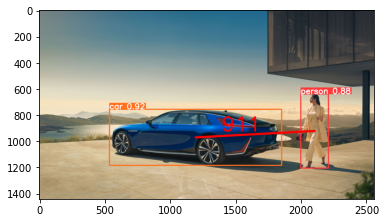

In [ ]:
image = np.squeeze(results.render())
window_name = 'Image'
start_point = (int(center[0][0]), int(center[0][1]))

end_point = (int(center[1][0]), int(center[1][1]))

# Blue color in BGR
color = (255, 0, 0)
# Line thickness 
thickness = 15
label = str(int(distance))
text_org = (int(center[0][0] + 200) , int(center[0][1]) - 50)
image = cv2.line(image, start_point, end_point, color, thickness)
image = cv2.putText(image, label, text_org, cv2.FONT_HERSHEY_SIMPLEX, 5, color, 12,  cv2.LINE_AA)
# Displaying the image 
plt.imshow(image)
plt.show()